# Exploratory Data Analysis & Preprocessing

This notebook covers initial data loading, exploratory data analysis (EDA), handling missing values, dropping low-impact or highly null features, and feature engineering to prepare the dataset for modeling.

In [1]:
# Import libraries and set style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

In [2]:
# Load the data
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape:  {test.shape}")

Train shape: (1460, 81)
Test shape:  (1459, 80)


In [3]:
# Quick look at the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Basic info & statistics
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Basic info & statistics for test set
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
# Save Id column and drop it (not useful for modeling)
train_Id = train['Id']
test_Id = test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

### Target Variable Transformation (log1p)

The `SalePrice` variable has a right-skewed distribution — many lower-priced houses and a few extremely expensive ones.
This creates a long tail, which may negatively impact model performance, as the model attempts to fit those extreme values.

To:

- reduce the influence of outliers,

- stabilize variance,

- make the distribution more normally shaped,

we applied a logarithmic transformation using `np.log1p()`.
This approach improves prediction quality and helps the model better capture patterns in the data.

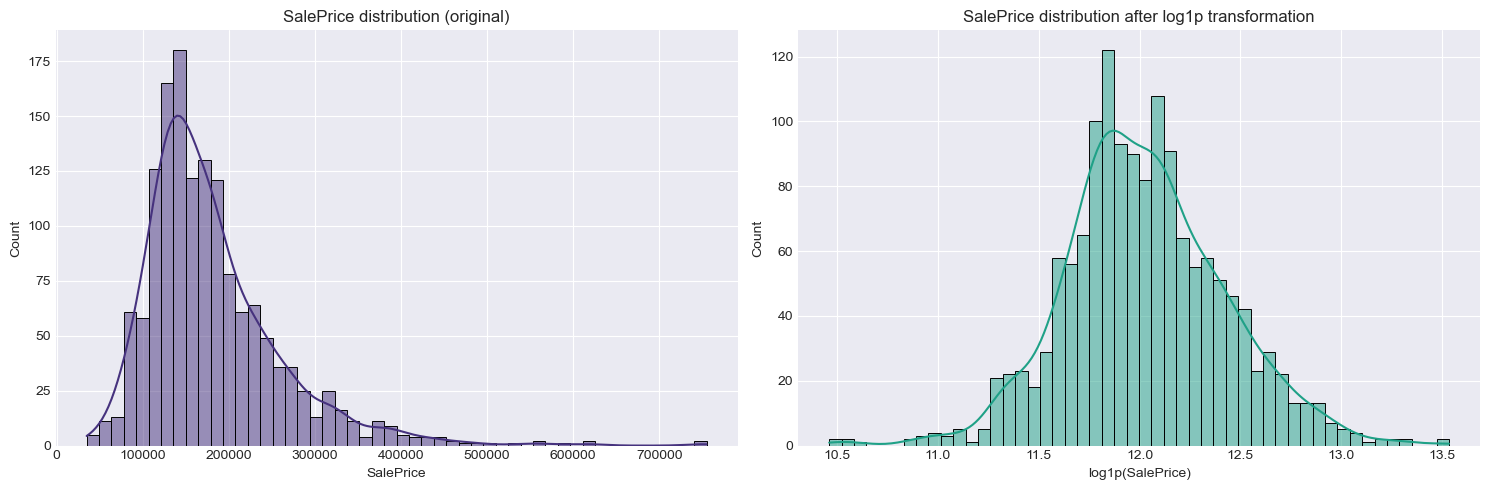

In [7]:
# Target variable analysis — SalePrice
palette = sns.color_palette("viridis")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original distribution (skewed right)
sns.histplot(train['SalePrice'], kde=True, ax=axes[0], bins=50, color=palette[0])
axes[0].set_title('SalePrice distribution (original)')
axes[0].set_xlabel('SalePrice')

# Log-transformed (more normal)
sns.histplot(np.log1p(train['SalePrice']), kde=True, ax=axes[1], bins=50, color=palette[3])
axes[1].set_title('SalePrice distribution after log1p transformation')
axes[1].set_xlabel('log1p(SalePrice)')

plt.tight_layout()
plt.show()

# Save log-transformed target (we will predict log, then expm1 back)
y = np.log1p(train['SalePrice'])

## Correlation Analysis with SalePrice

Quick check: which numeric features have the strongest linear relationship with the target? 

We compute Pearson correlation and visualize the top 15 most correlated features (excluding SalePrice itself).

Top 15 positive correlations with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64


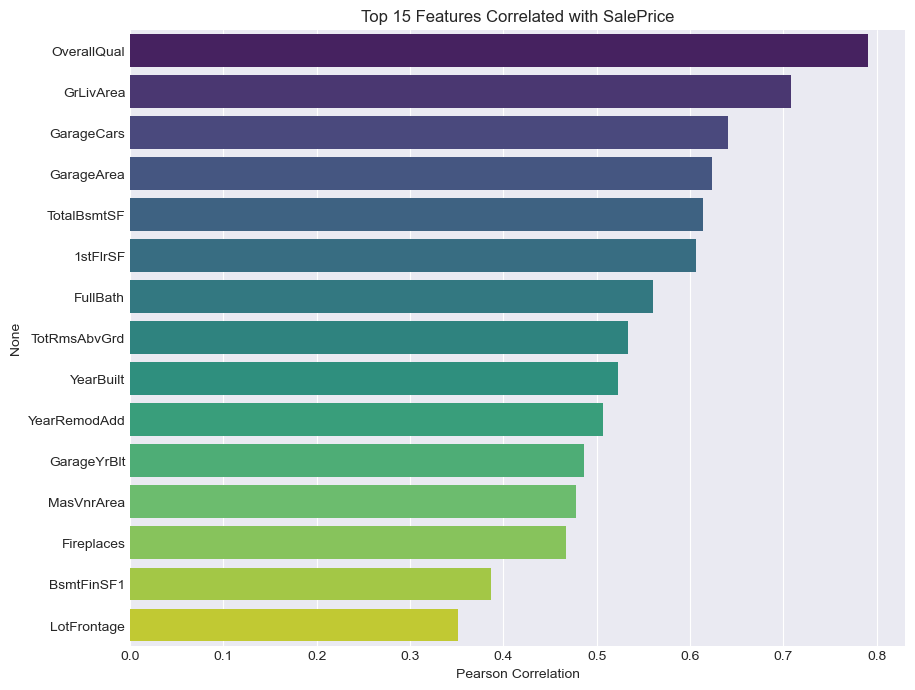

In [8]:
# Correlation with target (only numeric features)
numeric_cols = train.select_dtypes(include=[np.number]).columns
corr_matrix = train[numeric_cols].corr()

# Top 15 most correlated features with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(16)
print("Top 15 positive correlations with SalePrice:")
print(top_corr_features[1:16])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr_features[1:], y=top_corr_features.index[1:], palette='viridis')
plt.title('Top 15 Features Correlated with SalePrice')
plt.xlabel('Pearson Correlation')
plt.show()

## Missing Values Analysis & Handling

We analyze missing data patterns, decide which features to drop due to high null ratios or low importance, and apply smart imputation strategies based on domain logic.

Columns with missing values:
              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtCond         37   2.534247
BsmtQual         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493
MSSubClass        0   0.000000


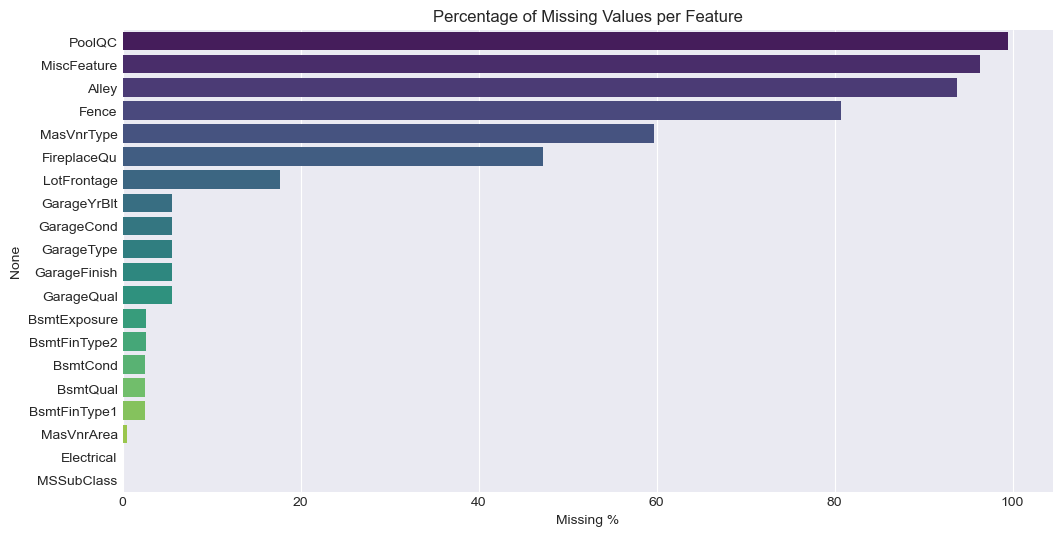

In [9]:
# Missing values analysis
total_missing = train.isnull().sum().sort_values(ascending=False)
percent_missing = (train.isnull().sum() / train.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

print("Columns with missing values:")
print(missing_data.head(20))

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.head(20)['Percent'], y=missing_data.head(20).index, palette='viridis')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Missing %')
plt.show()

### Dropping Uninformative Features

We removed some features because:

- They contained too many missing values (over 80%).

- They were identifiers or text labels that do not carry predictive value for the model.

- They showed very low correlation with SalePrice.

Removing such features helps reduce noise in the dataset and improves model performance.

In [10]:
# Drop columns with too many missing values or low information
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
print("Missing values before processing in train set:")
print(train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False))
print("\nMissing values before processing in test set:")
print(test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending=False))

Missing values before processing in train set:
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

Missing values before processing in test set:
LotFrontage     227
GarageYrBlt      78
GarageCond       78
GarageQual       78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Functional        2
GarageCars        1
GarageArea        1
BsmtUnfSF         1
KitchenQual       1
TotalBsmtSF       1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64


## Smart Missing Values Imputation

We treat "missing" not as an error, but as meaningful information:

- **LotFrontage** → filled with neighborhood median (houses on the same street are similar)  
- **Garage & Basement features** → NaN = "No Garage" / "No Basement" → replaced with special categories and 0s  
- **MasVnrArea** → missing = no masonry veneer → 0  
- Rare single missing values → filled with mode or logical defaults  
- Test-only missings → safely filled using the most common / typical values

This approach preserves real-world meaning and prevents data leakage.

Result after imputation: **0 missing values in both train and test sets**

In [12]:
# Fill missing values

# LotFrontage — linear feet of street connected to property (houses in the same neighborhood usually have similar values)
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test["LotFrontage"]  = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Fallback for rare neighborhoods where median is still NaN
train["LotFrontage"].fillna(train["LotFrontage"].median(), inplace=True)
test["LotFrontage"].fillna(train["LotFrontage"].median(), inplace=True)

# Garage features — missing = no garage at all
garage_categorical = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_categorical:
    train[col].fillna("NoGarage", inplace=True)
    test[col].fillna("NoGarage", inplace=True)

# Year the garage was built → if no garage = year the house was built
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["YearBuilt"])
test["GarageYrBlt"]  = test["GarageYrBlt"].fillna(test["YearBuilt"])

# Basement features — missing = no basement
bsmt_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmt_categorical:
    train[col].fillna("NoBasement", inplace=True)
    test[col].fillna("NoBasement", inplace=True)

bsmt_numeric = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                'BsmtFullBath', 'BsmtHalfBath']
for col in bsmt_numeric:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

# Masonry veneer — missing = 0
train["MasVnrArea"].fillna(0, inplace=True)
test["MasVnrArea"].fillna(0, inplace=True)


# Electrical — only 1 missing in train → mode
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)

# Test set only — several features have few missing values
test["MSZoning"].fillna(test["MSZoning"].mode()[0], inplace=True)
test["Utilities"].fillna("AllPub", inplace=True)                    # according to data description
test["Functional"].fillna("Typ", inplace=True)                      # typical functionality
test["Exterior1st"].fillna(test["Exterior1st"].mode()[0], inplace=True)
test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0], inplace=True)
test["KitchenQual"].fillna(test["KitchenQual"].mode()[0], inplace=True)
test["SaleType"].fillna(test["SaleType"].mode()[0], inplace=True)

# Garage numeric (test set)
test["GarageCars"].fillna(0, inplace=True)
test["GarageArea"].fillna(0, inplace=True)

# Final check
print("\nMissing values after professional imputation:")
print(f"Train remaining NaN: {train.isnull().sum().sum()}")
print(f"Test remaining NaN : {test.isnull().sum().sum()}")


Missing values after professional imputation:
Train remaining NaN: 0
Test remaining NaN : 0


## Feature Engineering

We created new features to better represent the characteristics of each house:

- `TotalSF` — total living area (basement + 1st + 2nd floor); one of the strongest predictors of house prices.

- `TotalPorchSF` — total combined area of all porches; indicates additional home comfort and usability.

- `HouseAge` — current age of the house; older homes often have lower market value unless renovated.

- `IsRemodeled` — indicates whether the house was remodeled after construction; renovations typically increase value.

- `TotalBath` — total number of bathrooms in a practical format (e.g., 1.5, 2.5).

- `HasGarage` — whether the house has a garage; an important feature, especially in suburban areas.

In [13]:
# Feature Engineering 

for df in [train, test]:
    # Total living area
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Total porch area
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    
    # Age of the house
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    
    # Was the house remodeled?
    df['IsRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)
    
    # Total bathrooms
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    
    # Has garage?
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)

## One-Hot Encoding (Consistent Across Train & Test)

To avoid data leakage and mismatched columns:
- Combine train + test sets (temporarily, without SalePrice)
- Apply `pd.get_dummies()` once to both datasets
- Use `drop_first=True` to prevent multicollinearity
- Split back into train and test

Result: perfectly aligned feature sets ready for modeling.

In [14]:
# Combine train + test → same columns after dummies
n_train = train.shape[0]
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)

print(f"Data combined for encoding: {all_data.shape}")

# Apply one-hot encoding
all_data = pd.get_dummies(all_data, drop_first=True)  # drop_first avoids multicollinearity

# Split back
X = all_data[:n_train]
X_test = all_data[n_train:]

print(f"After one-hot encoding:")
print(f"   → Train features shape: {X.shape}")
print(f"   → Test features shape : {X_test.shape}")

Data combined for encoding: (2919, 79)
After one-hot encoding:
   → Train features shape: (1460, 244)
   → Test features shape : (1459, 244)


In [15]:
# Check train/test feature alignment before modeling
print("Extra features in Train not in Test:")
print(set(X.columns) - set(X_test.columns))

print("\nExtra features in Test not in Train:")
print(set(X_test.columns) - set(X.columns))

Extra features in Train not in Test:
set()

Extra features in Test not in Train:
set()


In [16]:
# Final save — ready for modeling notebook
X.to_pickle('data/X_processed.pkl')
X_test.to_pickle('data/X_test_processed.pkl')
y.to_pickle('data/y_log.pkl')

print(f"Final training features: {X.shape[1]} columns")

Final training features: 244 columns


In [17]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


### Data preprocessing and feature engineering are complete.

Next step: we move to notebook **02_modeling_and_submission**, where we will:
- Train & tune Random Forest + XGBoost  
- Run 5-fold Cross-Validation (RMSE)  
- Compare models  
- Plot feature importance  
- Train final XGBoost on full data  
- Generate submission
- Save model for future